In [2]:
%matplotlib notebook
from bdots import ScopeChannel, MitlBdots
import matplotlib.pyplot as plt
import numpy as np

marx_volts={'G':'C1', 'H':'C2','C':'D1', 'Z':'D2'}
mitl_bdots=['A1','A2','B1','B2']

In [11]:
scope="11"

marx='Z'
#shots=['s0504_16','s0505_16', 's0607_16']
shots=['s0824_16', 's0825_16','s0826_16']

sc=[ScopeChannel(s, scope, marx_volts[marx]) for s in shots]


<IPython.core.display.Javascript object>


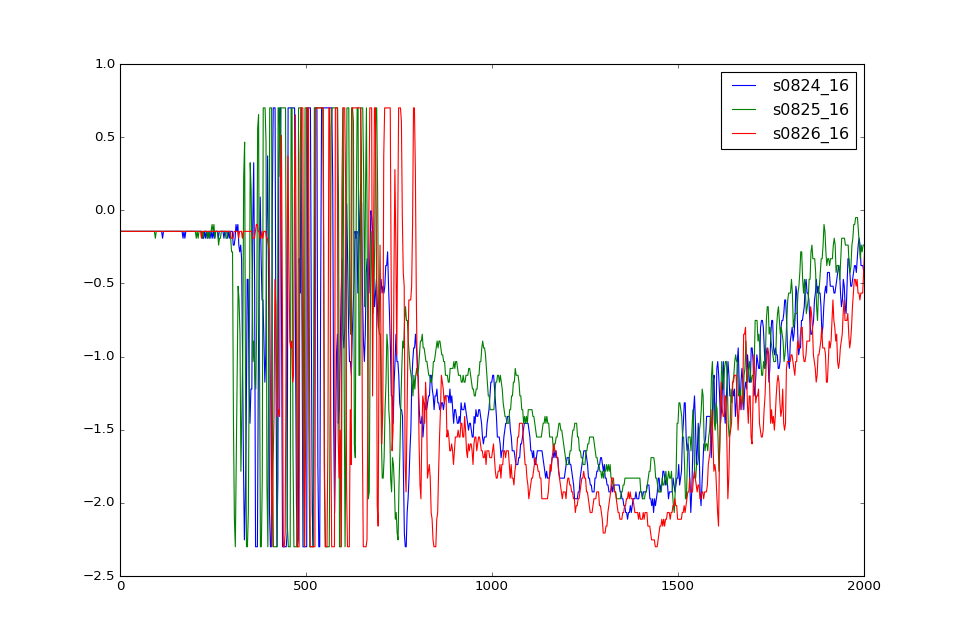

In [12]:
fig, ax=plt.subplots(figsize=(12,8))
for s in sc:
    ax.plot(s.time, s.data, label=s.shot)
    
ax.set_xlim(0,2000)
#ax.set_ylim(-6,6)
ax.legend()
    

In [29]:
mb=[]
#shots=['s0121_16','s0119_16','s0607_16']
shots=['s0607_16','s0119_16','s0120_16', 's0120B16','s0121_16']

for s in shots:
    m=MitlBdots(s)
    m.truncate()
    m.integrate()
    mb.append(m)

<IPython.core.display.Javascript object>


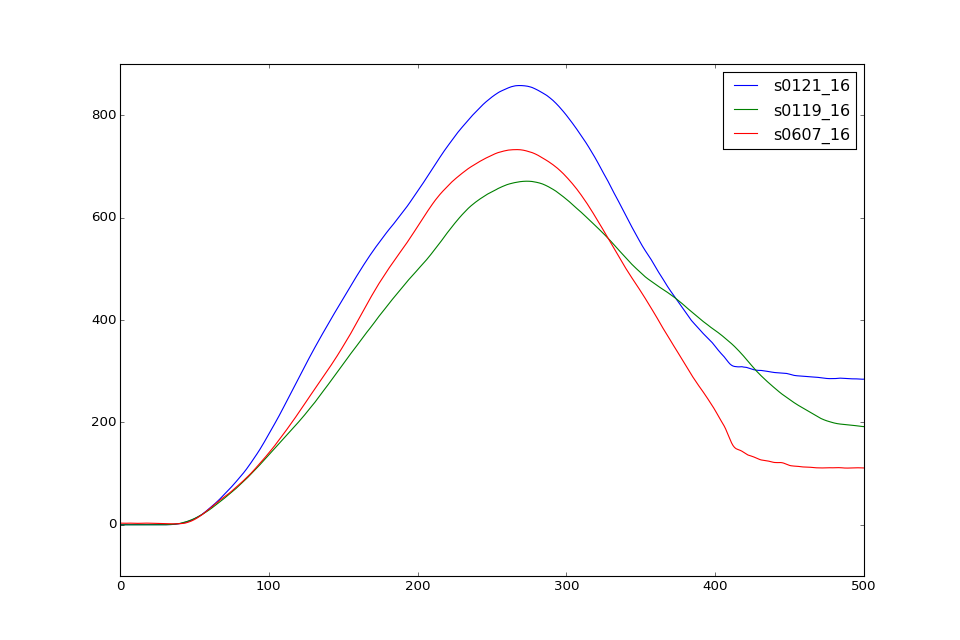

In [16]:
fig, ax=plt.subplots(figsize=(12,8))
for m in mb:
    b=m.mbds[3]
    ax.plot(b.time_B0, b.B, label=m.shot)
    
ax.set_xlim(0,500)
#ax.set_ylim(-6,6)
ax.legend()

In [30]:
print('Shot\t\tBd1\tBd2\tBd3\tBd4\tBTot')
for m in mb:
    stri=m.shot+':\t'
    tot=0
    for b in m.mbds:
        BM=int(np.abs(b.B).max())
        tot=tot+BM
        stri=stri+str(BM)+'\t'
    stri=stri+str(tot)
    print(stri)


Shot		Bd1	Bd2	Bd3	Bd4	BTot
s0607_16:	300	3	393	732	1428
s0119_16:	624	264	371	671	1930
s0120_16:	751	319	438	799	2307
s0120B16:	721	305	451	759	2236
s0121_16:	806	336	493	857	2492
